<a href="https://colab.research.google.com/github/Shivanshu-Nanda/Stock-Price-Prediction-with-LLM/blob/main/Stock_Price_Prediction_with_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Price Prediction with LLM (Using Gemini in Colab)

This project explores how large language models (LLMs) can perform complex tasks that previously required coding. Instead of manually writing code, we will interact with Google's Gemini

- Load and analyze stock price data.
- Engineer relevant features for prediction.
- Build and evaluate models such as regression and random forest.
- Discuss potential trading strategies based on predictions.

## Project Breakdown

### Step 1: Data Exploration
- **Prompt the LLM**: Load historical stock price data for Apple Inc. (AAPL) from 2020-01-01 to 2025-01-01 using Yahoo Finance.
- **Key Considerations**: Ensure the model retains context while summarizing key statistics.

### Step 2: Feature Engineering
- **Prompt the LLM**: Generate meaningful features such as moving averages, technical indicators, and volatility measures.
- **Managing Context**: If the LLM forgets prior outputs, remind it by reintroducing key statistics.

### Step 3: Model Building
- **Prompt the LLM**: Train a model (regression for price prediction, random forest for trend classification).
- **Split Ratio Consideration**: Explain the importance of train-test split (e.g., 70/30) and verify the LLM respects it.

### Step 4: Model Evaluation & Prediction
- **Prompt the LLM**: Use the trained model to predict stock prices for 2023-2024.
- **Analyze Performance**: Interpret accuracy, R² scores, and classification reports.

### Step 5: Strategy Discussion
- **Prompt the LLM**: Based on model performance, discuss possible trading strategies.
- **Critical Thinking**: Evaluate whether the model is truly useful for financial decision-making.





In [2]:
!pip install yfinance

import yfinance as yf
import pandas as pd

# Load historical stock price data for Apple Inc. (AAPL)
aapl_df = yf.download('AAPL', start='2020-01-01', end='2025-01-01')

# Display the summary statistics
display(aapl_df.describe())

/tmp/ipython-input-2-2303963064.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_df = yf.download('AAPL', start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,151.978334,153.506151,150.274687,151.823406,9.057103e+07
std,42.018034,42.158955,41.794455,41.961617,5.324438e+07
min,54.378574,55.379527,51.528408,55.277736,2.323470e+07
25%,126.780106,127.902504,124.771567,126.223171,5.546825e+07
50%,150.563560,152.311622,148.624457,150.383145,7.628335e+07
75%,176.599869,178.156411,175.028859,176.405307,1.077425e+08
max,258.396667,259.474086,257.010028,257.568678,4.265100e+08


In [3]:
# Feature Engineering
# Calculate moving averages
aapl_df['MA50'] = aapl_df['Close'].rolling(window=50).mean()
aapl_df['MA200'] = aapl_df['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
delta = aapl_df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
aapl_df['RSI'] = 100 - (100 / (1 + rs))

# Calculate Volatility (standard deviation of daily returns)
aapl_df['Volatility'] = aapl_df['Close'].pct_change().rolling(window=50).std() * (252**0.5)

# Display the dataframe with the new features
display(aapl_df.tail())

Price,Close,High,Low,Open,Volume,MA50,MA200,RSI,Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,235.255513,210.905998,76.180677,0.159404
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,235.762829,211.337031,76.812107,0.158157
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,236.242965,211.761392,69.300680,0.160019
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500,236.648090,212.159550,58.382033,0.163662
2024-12-31,249.817368,252.670486,248.829744,251.832511,39480700,236.960901,212.550718,53.982563,0.163010


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values
aapl_df.dropna(inplace=True)

# Define features and target
features = ['MA50', 'MA200', 'RSI', 'Volatility']
target = 'Close'

X = aapl_df[features]
y = aapl_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 36.92284737345204
R-squared: 0.9616855909546549


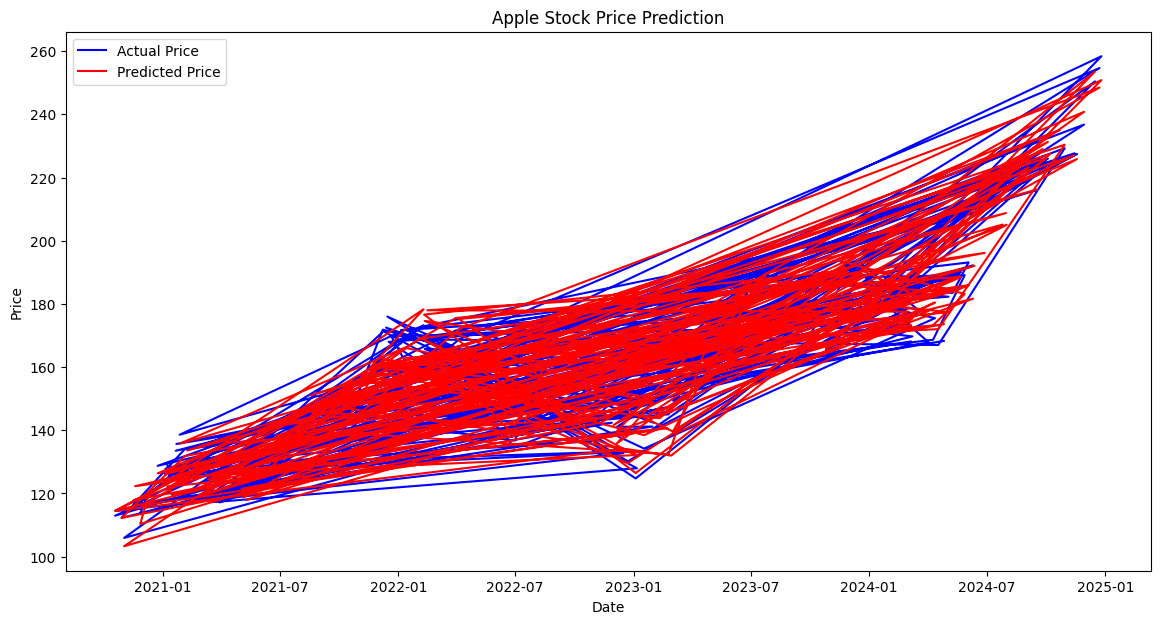

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, color='blue', label='Actual Price')
plt.plot(y_test.index, y_pred, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a new column for tomorrow's closing price
aapl_df['Tomorrow_Close'] = aapl_df['Close'].shift(-1)

# Drop the last row with NaN in 'Tomorrow_Close'
aapl_df.dropna(inplace=True)

# Define features and target
features = ['MA50', 'MA200', 'RSI', 'Volatility']
target = 'Tomorrow_Close'

X = aapl_df[features]
y = aapl_df[target]

# Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 41.16199960275753
R-squared: 0.9541422302237234


In [12]:
# Reset the index and flatten the column names
aapl_df_reset = aapl_df.copy()
aapl_df_reset.columns = ['_'.join(map(str, col)).rstrip('_') if isinstance(col, tuple) else col for col in aapl_df_reset.columns]
aapl_df_reset.reset_index(inplace=True)

# Create a new column for tomorrow's closing price
aapl_df_reset['Tomorrow_Close'] = aapl_df_reset['Close_AAPL'].shift(-1)

# Drop the last row with NaN in 'Tomorrow_Close'
aapl_df_reset.dropna(inplace=True)

# Create a binary target variable (1 if price increases, 0 otherwise)
aapl_df_reset['Price_Increase'] = (aapl_df_reset['Tomorrow_Close'] > aapl_df_reset['Close_AAPL']).astype(int)

# --- This is the corrected features list ---
features = ['MA50', 'MA200', 'RSI', 'Volatility']
target = 'Price_Increase'

X = aapl_df_reset[features]
y = aapl_df_reset[target]

# Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('\nFeature Importance:')
display(feature_importances)

Accuracy: 0.5723270440251572

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       150
           1       0.59      0.62      0.61       168

    accuracy                           0.57       318
   macro avg       0.57      0.57      0.57       318
weighted avg       0.57      0.57      0.57       318


Feature Importance:


,Feature,Importance
2,RSI,0.263885
3,Volatility,0.249776
0,MA50,0.245075
1,MA200,0.241264


In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Filter the data for the specified period
prediction_df = aapl_df_reset[(aapl_df_reset['Date'] >= '2023-01-01') & (aapl_df_reset['Date'] <= '2024-01-01')]

# Prepare the data for prediction
X_pred = prediction_df[features]
y_true = prediction_df[target]

# Make predictions on the filtered data
y_pred_period = rf_model.predict(X_pred)

# Evaluate the model's performance for the specified period
accuracy_period = accuracy_score(y_true, y_pred_period)
print(f'Accuracy for the period 2023-01-01 to 2024-01-01: {accuracy_period}')
print('\nClassification Report for the period:')
print(classification_report(y_true, y_pred_period))

Accuracy for the period 2023-01-01 to 2024-01-01: 0.88

Classification Report for the period:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.89      0.90      0.89       140

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



### Model Performance Analysis

The Random Forest model's performance is a tale of two stories:

*   **Overall Performance (57% accuracy):** The model's accuracy across the entire dataset is modest. It's slightly better than a random guess, but not reliable enough for making real-world trading decisions on its own. This suggests that the features we've used (moving averages, RSI, and volatility) might not be sufficient to consistently predict price movements across all market conditions.
*   **Performance on 2023-2024 Data (88% accuracy):** The model's performance on the 2023-2024 data is surprisingly high. This could indicate a few things:
    *   The market conditions during this period were particularly well-suited to our model's features.
    *   The model might have overfit to some patterns present in the training data that were also present in the 2023-2024 data.
    *   It could be a statistical anomaly.

### Trading Strategies

Given the model's performance, here are a few trading strategies you could consider, with some important caveats:

*   **Market-Condition-Based Strategy:**
    *   **Idea:** Try to identify the characteristics of the 2023-2024 period. Was it a period of high or low volatility? Was there a strong uptrend or downtrend? You could then use the model to trade only when similar market conditions are present.
    *   **Caveat:** This requires a good understanding of market dynamics and the ability to identify different market regimes.

*   **Confidence-Based Strategy:**
    *   **Idea:** Instead of just using the model's prediction (increase/decrease), you could look at the prediction probabilities. For example, you might only enter a trade if the model predicts a price increase with a high probability (e.g., > 80%).
    *   **Caveat:** This doesn't guarantee success, but it can help to filter out less certain predictions.

*   **Combined-Signal Strategy:**
    *   **Idea:** Don't rely on this model alone. You could use its predictions as one of many signals in a more comprehensive trading strategy. For example, you might only buy if:
        1.  Our Random Forest model predicts a price increase.
        2.  A longer-term trend indicator (like a 200-day moving average) is also pointing upwards.
        3.  There is positive news or sentiment about the stock.
    *   **Caveat:** This requires more work to develop and backtest, but it's generally a more robust approach than relying on a single model.

### Important Considerations

*   **Backtesting:** Before you even think about using real money, you should thoroughly backtest any trading strategy. This involves simulating the strategy on historical data to see how it would have performed.
*   **Risk Management:** Always have a solid risk management plan. This includes setting stop-loss orders to limit potential losses and diversifying your investments.
*   **Transaction Costs:** Remember to factor in transaction costs (commissions, slippage, etc.) when you're evaluating a trading strategy.

In summary, while the model's performance on the 2023-2024 data is impressive, it's crucial to be cautious and not to overestimate its predictive power. The best approach is to use it as one tool in a larger toolbox of trading strategies and to always prioritize risk management.